# UCI ML Datasets - Boston Housing Dataset - Regression with 93% ACC
## This is a Data Set from UCI Machine Learning Repository which concerns housing values in suburbs of Boston.

After exploring the data using EDA, we fill out the missing values. Than we deal with the outliers and begin modeling using different Regression Algorithms. In the end we use deep learning to see if we can achieve better results.

### Attribute Information:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 Dollars
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000's

For more information about the dataset use the following Kaggle link: <br>
https://www.kaggle.com/datasets/heptapod/uci-ml-datasets


## Import Libraries and Load Data

In [168]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/boston-housing-dataset/HousingData.csv


In [169]:
# Load Data
df=pd.read_csv("/kaggle/input/boston-housing-dataset/HousingData.csv")

## EDA - Exploratory Data Analysis

In [170]:
df.head() #first 5 entries

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [171]:
df.info() # infos about the rows, columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [172]:
df.isnull().sum() # checking for missing values

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

We have a total of 506 entries with 14 columns of information and some missing values.

In [173]:
df.describe() # statistical infos of the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [174]:
df.corr() # the correlation between the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


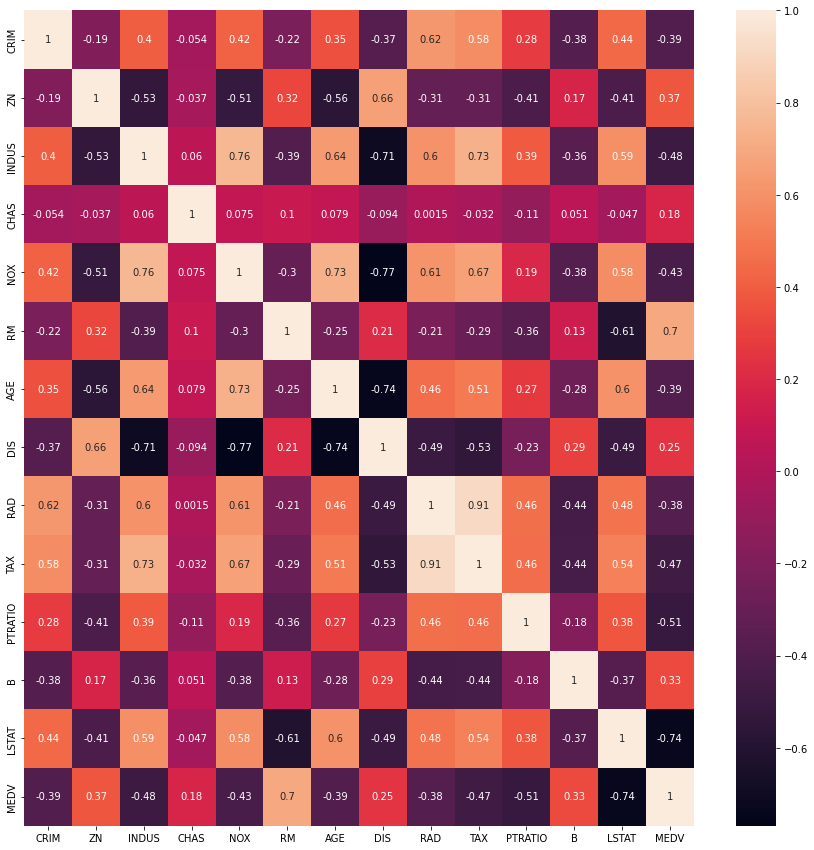

In [175]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

#### Data Visualization

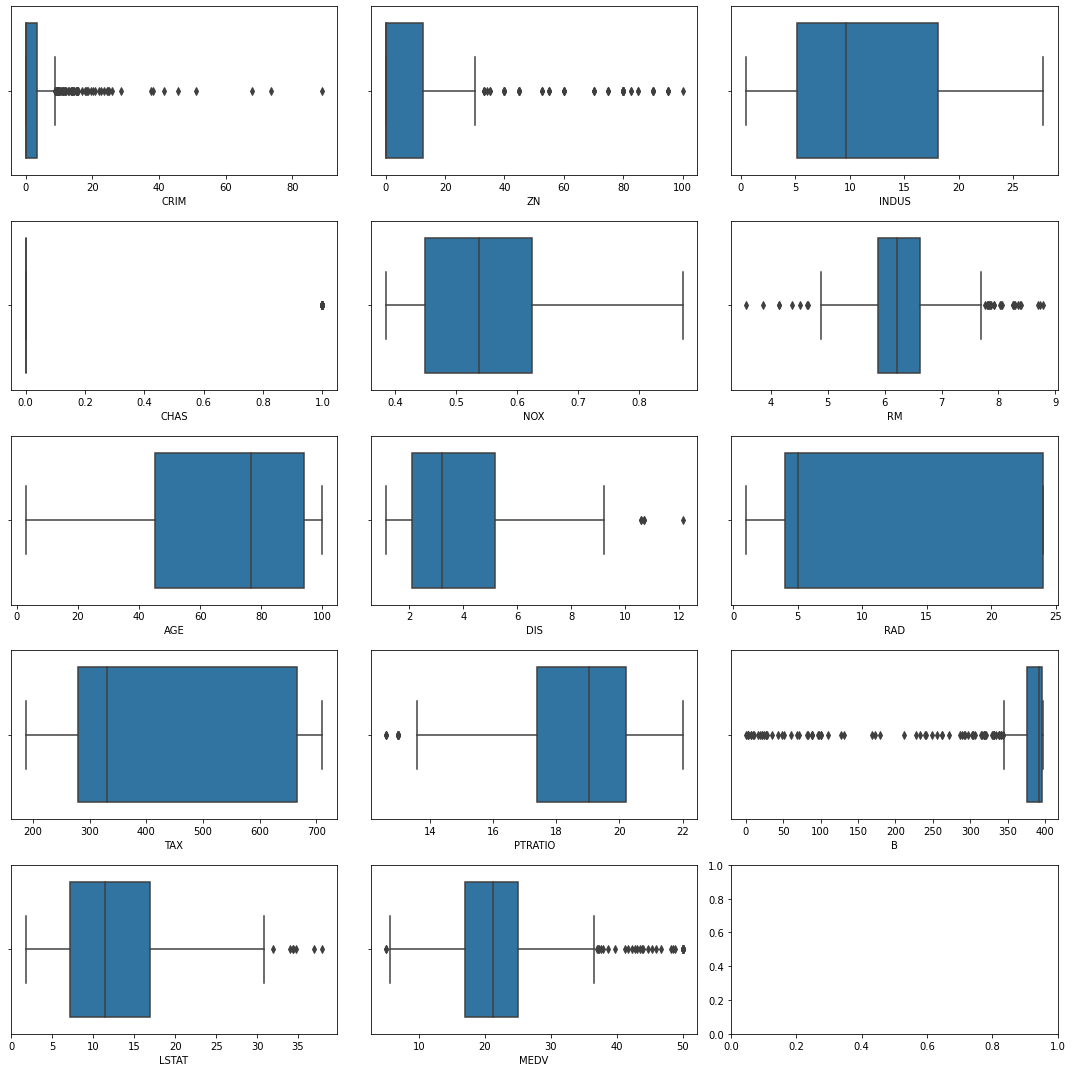

In [176]:
# Create a figure and a set of subplots with as many rows as needed and 3 columns
num_rows = (len(df.columns) + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,15))

# Create a boxplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

This code above was created by ChatGPT :) <br>
Through these boxplots we can see that we have outliers and we have to deal with them.

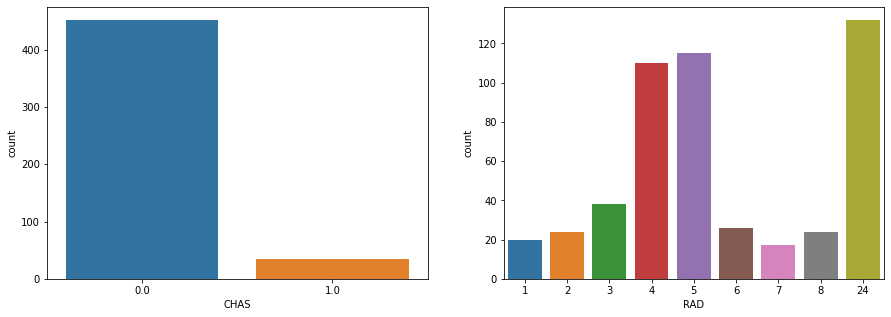

In [177]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
sns.countplot(x=df['CHAS']);
fig.add_subplot(1, 2, 2)
sns.countplot(x=df['RAD']);

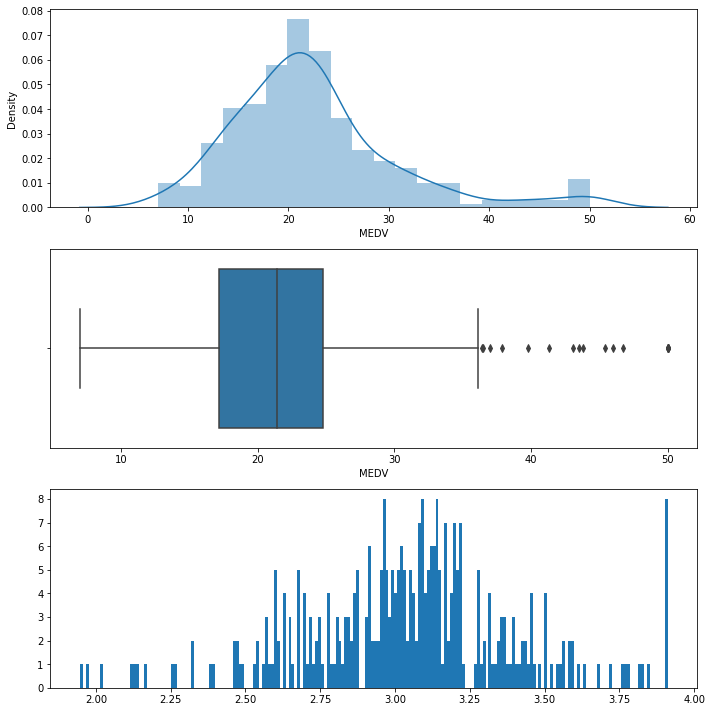

In [201]:
fig = plt.figure(figsize=(10,10)) # plotting the MEDV in different forms
fig.add_subplot(3,1,1)
sns.distplot(df['MEDV'])
fig.add_subplot(3,1,2)
sns.boxplot(df['MEDV'])
fig.add_subplot(3,1,3)
plt.hist((np.log(df.MEDV)), bins=200);
plt.tight_layout();

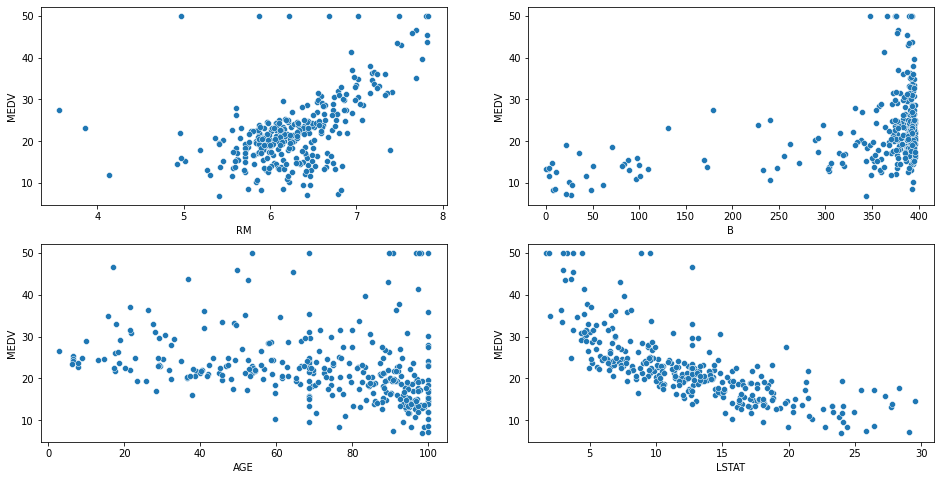

In [206]:
fig = plt.figure(figsize=(16,8)) # seeing the corr of columns to the MEDV
fig.add_subplot(2,2,1)
sns.scatterplot(df['RM'], df['MEDV'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['B'],df['MEDV'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['AGE'],df['MEDV'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['LSTAT'],df['MEDV']);

## Missing Value Treatment

We are filling missing values with mean or mode values of each missing column.

In [178]:
df["CRIM"].fillna(df["CRIM"].mean(), inplace=True) # fill CRIM with mean value
df["ZN"].fillna(0, inplace=True) # fill ZN with mode value, because 360 of the entries are 0
df["INDUS"].fillna(df["INDUS"].mean(), inplace=True) # fill INDUS with mean value
df["CHAS"].fillna(0, inplace=True) # fill CHAS with mode value, because 452 of the entries are 0
df["AGE"].fillna(df["AGE"].mean(), inplace=True) # fill AGE with mean value
df["LSTAT"].fillna(df["LSTAT"].mean(), inplace=True) # fill LSTAT with mean value

In [179]:
df.isnull().sum() # no more missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Outlier Treatment

In [180]:
outliers = df.quantile(.97) # dealing with the outliers seen in the boxplots above
df = df[(df['CRIM']<outliers['CRIM'])]
df = df[(df['ZN']<outliers['ZN'])]
df = df[(df['RM']<outliers['RM'])]
df = df[(df['DIS']<outliers['DIS'])]
df = df[(df['PTRATIO']<outliers['PTRATIO'])]
df = df[(df['B']<outliers['B'])]
df = df[(df['LSTAT']<outliers['LSTAT'])]

In [181]:
# see how the other columns are correlated with MEDV (Median value of owner-occupied homes in $1000's)
abs(df.corr()["MEDV"].sort_values(ascending=False))

MEDV       1.000000
RM         0.547155
B          0.410849
ZN         0.288001
CHAS       0.227926
DIS        0.138795
RAD        0.280554
AGE        0.301971
NOX        0.331190
TAX        0.359319
CRIM       0.360421
INDUS      0.368039
PTRATIO    0.410473
LSTAT      0.731104
Name: MEDV, dtype: float64

## Feature Engineering

In [182]:
# giving more relevance to the columns which are more correlated with MEDV to achieve higher results
#df["RM"]=df["RM"]**2
#df["B"]=df["B"]**2
#df["PTRATIO"]=df["PTRATIO"]**2

With this our results got only worse, so I restarted without using feature engineering.

## MODELING

In [225]:
# Function to call all Regression Algorithms
def regression_funct(x,y):
    #importing Regression libraries
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from xgboost import XGBRegressor
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    # split the data in Train and Test 
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    XGBC= XGBRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN,XGBC]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor','XGBRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names) # create df with results
    
    for item in algos: # fit and predict model with all algos and append the results in their lists
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [226]:
x,y=df.drop("MEDV",axis=1),df[["MEDV"]] # Assign x and y

In [227]:
regression_funct(x,y) # call regression function and see results in a Dataframe

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.933282,1.977960,1.587596
XGBRegressor,0.911645,2.276202,1.858557
Ridge,0.751404,3.818047,2.815662
LinearRegression,0.742709,3.884251,2.928353
ElasticNet,0.741159,3.895930,2.866464
Lasso,0.733467,3.953396,2.910935
ExtraTreeRegressor,0.507285,5.375171,3.576923
KNeighborsRegressor,0.407491,5.894431,4.269846


The best result shows the **GradientBoostingRegressor with 93% accuracy** and **RMSE of 2, MAE of 1.6** followd by XGBRRegressor with 91% and RidgeRegression with 75% 

## Using Deep Learning

In [186]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
scaler=MinMaxScaler()

In [210]:
x,y=df.drop("MEDV",axis=1),df[["MEDV"]] # Assign x and y
x=scaler.fit_transform(x) # scale x values

In [211]:
# split data in test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [212]:
# Build the Model
model=Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [213]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 1s 268ms/step - loss: 581.5097 - val_loss: 499.5187
Epoch 2/500
2/2 [==============================] - 0s 45ms/step - loss: 569.4194 - val_loss: 475.0421
Epoch 3/500
2/2 [==============================] - 0s 47ms/step - loss: 533.1406 - val_loss: 408.5066
Epoch 4/500
2/2 [==============================] - 0s 45ms/step - loss: 438.4951 - val_loss: 256.5926
Epoch 5/500
2/2 [==============================] - 0s 49ms/step - loss: 242.4314 - val_loss: 79.3485
Epoch 6/500
2/2 [==============================] - 0s 46ms/step - loss: 143.0212 - val_loss: 216.1575
Epoch 7/500
2/2 [==============================] - 0s 52ms/step - loss: 140.6171 - val_loss: 72.9448
Epoch 8/500
2/2 [==============================] - 0s 49ms/step - loss: 73.3466 - val_loss: 90.1628
Epoch 9/500
2/2 [==============================] - 0s 48ms/step - loss: 111.8808 - val_loss: 99.9539
Epoch 10/500
2/2 [==============================] - 0s 48ms/step - loss: 113.0269 - va

In [214]:
model.summary() # summary of our  model, with total of 324.601 trainable params

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 200)               2800      
_________________________________________________________________
dense_61 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_62 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_63 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_64 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_65 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_66 (Dense)             (None, 200)              

<AxesSubplot:>

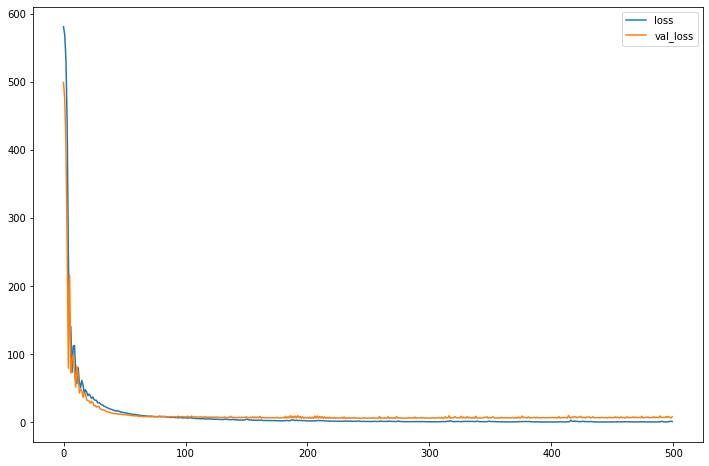

In [215]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8)) # Show results in a graph

In [193]:
pred=model.predict(x_test) # predict model

In [194]:
# show results
print("MSE:", (mean_squared_error(y_test,pred))**.5)
print("R2 Score:", r2_score(y_test,pred))

MSE: 3.0087848173674283
R2 Score: 0.8456192543122785


We have a **R2 Score of  85%** and a **MSE of 3** using deep learning with 500 epochs. This result is inbetween the XGBRegressor and RidgeRegression above and would be in third place.